In [106]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install tensorflow-cpu

Note: you may need to restart the kernel to use updated packages.


In [111]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [112]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [113]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image , cv2.COLOR_RGB2BGR)
    return image, results
    

In [114]:
def draw_styled_landmarks(image,results):
#    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
 #                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
  #                            mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #draw face connection
   # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
   #                          mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
   #                          mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=2)) #draw pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=3,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=3,circle_radius=2)) #draw left hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=3,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230),thickness=3,circle_radius=2)) #draw right hand connection

# 2.This fucntion uses open cv to access the camera
# Media pipe to detect face and hands

In [115]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret,frame = cap.read()
        
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)

        #Brake garacefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [116]:
draw_styled_landmarks(frame, results)

In [117]:
results

mediapipe.python.solution_base.SolutionOutputs

In [118]:
cap.release()
cv2.destroyAllWindows()

# 3.Mapping of Key Points

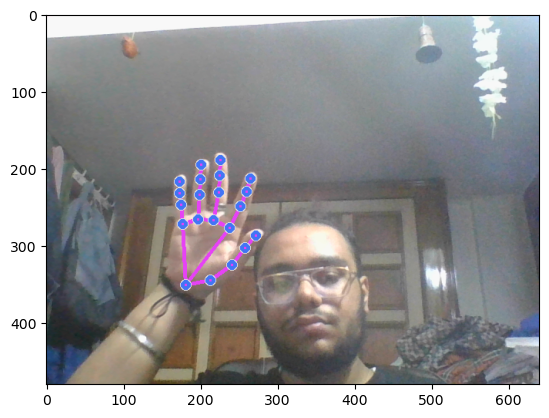

In [119]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 4.Extract Keypoint Values 

In [120]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [121]:
pose

array([ 5.43174148e-01,  7.89786279e-01, -9.00150001e-01,  9.99705076e-01,
        5.67451119e-01,  7.31796622e-01, -8.24283421e-01,  9.99443948e-01,
        5.85237563e-01,  7.29789376e-01, -8.24349046e-01,  9.99269426e-01,
        6.00939155e-01,  7.28933871e-01, -8.24155211e-01,  9.99223113e-01,
        5.13553381e-01,  7.42600620e-01, -8.23346138e-01,  9.99524415e-01,
        4.95144516e-01,  7.48336256e-01, -8.23240757e-01,  9.99489129e-01,
        4.77252871e-01,  7.54988253e-01, -8.23802292e-01,  9.99628305e-01,
        6.26798391e-01,  7.51163781e-01, -3.63754332e-01,  9.99200284e-01,
        4.59684223e-01,  7.80654132e-01, -3.42631400e-01,  9.99787390e-01,
        5.78299403e-01,  8.49304855e-01, -7.31113613e-01,  9.99235451e-01,
        5.11479437e-01,  8.53458822e-01, -7.27889597e-01,  9.99611080e-01,
        7.52452374e-01,  9.98430312e-01, -9.23428237e-02,  9.68652487e-01,
        3.78891736e-01,  1.01040101e+00, -2.05248982e-01,  9.95100975e-01,
        8.87020707e-01,  

In [122]:
face

array([ 0.53458458,  0.81839997, -0.03171536, ...,  0.59157896,
        0.70072991,  0.01704616])

In [123]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [124]:
rh

array([ 2.84021765e-01,  7.32942879e-01,  2.66286889e-07,  3.32920402e-01,
        7.19941914e-01, -2.39349697e-02,  3.77084941e-01,  6.77140892e-01,
       -3.23106125e-02,  4.04216647e-01,  6.32306039e-01, -3.91262211e-02,
        4.26235318e-01,  5.99111974e-01, -4.53705192e-02,  3.72714847e-01,
        5.77689350e-01, -1.42280487e-02,  3.95270854e-01,  5.18822372e-01,
       -2.79455725e-02,  4.06498969e-01,  4.80440140e-01, -4.08487394e-02,
        4.15114999e-01,  4.43790406e-01, -5.08324429e-02,  3.40539545e-01,
        5.56731224e-01, -1.35877170e-02,  3.50027174e-01,  4.82079625e-01,
       -2.49326192e-02,  3.52926075e-01,  4.35617834e-01, -3.66785415e-02,
        3.54218125e-01,  3.95148158e-01, -4.54108901e-02,  3.08933944e-01,
        5.54821610e-01, -1.62155684e-02,  3.11373979e-01,  4.88416523e-01,
       -2.83592027e-02,  3.13199908e-01,  4.46193397e-01, -3.65910269e-02,
        3.14893484e-01,  4.07883584e-01, -4.22899984e-02,  2.76715428e-01,
        5.68484008e-01, -

In [125]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [126]:
def extract_keypoint(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [127]:
result_test= extract_keypoint(results)




In [128]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [129]:
np.save('0',result_test)

In [130]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 5.Setup Folders for collection

In [217]:
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['a','b','c','d','e','f','g','h','i','j','I','Yes','No','Please','Help','Hii','Bye','Thanku','ThumbsUp','Victory'])

#actions = np.array(['I','Yes','No','Please','Help','Hii','Bye','Thanku','ThumbsUp','Victory'])

no_sequences = 20

sequence_length = 30

In [218]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 6. Collect keypoint s values for training and testing



In [213]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    #Loop through actions
    for action in actions:
        #Loop through sequesnces aka videos
        for sequence in range(no_sequences):
            #Loop through Video Length aka sequence length
            for frame_num in range(sequence_length):
            
                # Read feed
                ret,frame = cap.read()

                #make detection
                image, results = mediapipe_detection(frame, holistic)

                #draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION' ,(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2 , cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0, 0, 255), 2 ,cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for{} Video Number{}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,225), 4, cv2.LINE_AA)
                #show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                
                #New export keypoints
                keypoints = extract_keypoint(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                

                #Brake garacefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()  

In [29]:
cap.release()
cv2.destroyAllWindows()

## 7. Preprossessed data and create labels

In [214]:
from sklearn.model_selection import train_test_split
#library for partitioning data collected into training and testing
from tensorflow.keras.utils import to_categorical



In [219]:
label_map={label:num for num,label in enumerate(actions)}


In [220]:
label_map


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'I': 10,
 'Yes': 11,
 'No': 12,
 'Please': 13,
 'Help': 14,
 'Hii': 15,
 'Bye': 16,
 'Thanku': 17,
 'ThumbsUp': 18,
 'Victory': 19}

In [221]:
sequences, labels= [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [222]:
np.array(sequences).shape

(400, 30, 126)

In [223]:
np.array(labels).shape

(400,)

In [224]:
X = np.array(sequences)

In [225]:
X

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.10521892e-01,  3.45317155e-01, -3.44724255e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.09274560e-01,  3.51587564e-01, -5.19301882e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.11903095e-01,  3.59883249e-01, -1.22046319e-03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.14140683e-01,  3.61694336e-01, -5.55230957e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.40030095e-01,  3.79378587e

In [226]:
X.shape

(400, 30, 126)

In [227]:
y = to_categorical(labels).astype(int)

In [228]:
y
#flatting out the array into binary values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [229]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.05)

In [230]:
X_test.shape

(20, 30, 126)

In [231]:
y_test.shape

(20, 20)

In [232]:
X_train.shape

(380, 30, 126)

In [233]:
y_train.shape

(380, 20)

## 8. Build and train LSTM Neural Nertwork Model

#keras API of TF allows us to define a neural networkmodels as a sequence of layers
#build a sequential neural network

In [234]:
from tensorflow.keras.models import Sequential
#build a sequential neural network.
from tensorflow.keras.layers import LSTM, Dense, Dropout
#helps us to perform action detection.
from tensorflow.keras.callbacks import TensorBoard
#traise the model as it is running.

In [274]:
log_dir = os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [275]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
#model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [276]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [277]:
model.fit(X_train , y_train, epochs=500,callbacks=[tb_callback])

Epoch 1/500
12/12 [==============================] - 15s 158ms/step - loss: 2.9895 - categorical_accuracy: 0.0632
Epoch 2/500
12/12 [==============================] - 2s 154ms/step - loss: 2.9358 - categorical_accuracy: 0.0816
Epoch 3/500
12/12 [==============================] - 2s 162ms/step - loss: 2.8730 - categorical_accuracy: 0.1395
Epoch 4/500
12/12 [==============================] - 2s 166ms/step - loss: 2.9221 - categorical_accuracy: 0.1658
Epoch 5/500
12/12 [==============================] - 2s 160ms/step - loss: 2.7605 - categorical_accuracy: 0.1184
Epoch 6/500
12/12 [==============================] - 2s 155ms/step - loss: 2.7387 - categorical_accuracy: 0.1368
Epoch 7/500
12/12 [==============================] - 2s 146ms/step - loss: 2.5902 - categorical_accuracy: 0.1921
Epoch 8/500
12/12 [==============================] - 2s 144ms/step - loss: 2.4839 - categorical_accuracy: 0.2289
Epoch 9/500
12/12 [==============================] - 2s 147ms/step - loss: 2.4568 - categorical

12/12 [==============================] - 2s 145ms/step - loss: 0.5340 - categorical_accuracy: 0.7816
Epoch 73/500
12/12 [==============================] - 2s 128ms/step - loss: 0.7541 - categorical_accuracy: 0.7237
Epoch 74/500
12/12 [==============================] - 1s 121ms/step - loss: 0.7294 - categorical_accuracy: 0.7421
Epoch 75/500
12/12 [==============================] - 2s 135ms/step - loss: 0.5990 - categorical_accuracy: 0.7658
Epoch 76/500
12/12 [==============================] - 2s 143ms/step - loss: 0.7313 - categorical_accuracy: 0.7026
Epoch 77/500
12/12 [==============================] - 2s 144ms/step - loss: 0.6998 - categorical_accuracy: 0.6842
Epoch 78/500
12/12 [==============================] - 2s 147ms/step - loss: 0.5685 - categorical_accuracy: 0.7500
Epoch 79/500
12/12 [==============================] - 2s 150ms/step - loss: 0.4627 - categorical_accuracy: 0.8053
Epoch 80/500
12/12 [==============================] - 2s 144ms/step - loss: 0.4505 - categorical_accu

12/12 [==============================] - 2s 141ms/step - loss: 0.3198 - categorical_accuracy: 0.8921
Epoch 144/500
12/12 [==============================] - 2s 147ms/step - loss: 0.3500 - categorical_accuracy: 0.8553
Epoch 145/500
12/12 [==============================] - 2s 201ms/step - loss: 0.2163 - categorical_accuracy: 0.9026
Epoch 146/500
12/12 [==============================] - 2s 175ms/step - loss: 0.2958 - categorical_accuracy: 0.8789
Epoch 147/500
12/12 [==============================] - 2s 203ms/step - loss: 0.1943 - categorical_accuracy: 0.9053
Epoch 148/500
12/12 [==============================] - 2s 159ms/step - loss: 0.1446 - categorical_accuracy: 0.9289
Epoch 149/500
12/12 [==============================] - 2s 136ms/step - loss: 0.1198 - categorical_accuracy: 0.9342
Epoch 150/500
12/12 [==============================] - 2s 135ms/step - loss: 0.1077 - categorical_accuracy: 0.9368
Epoch 151/500
12/12 [==============================] - 2s 137ms/step - loss: 0.1012 - categori

12/12 [==============================] - 2s 189ms/step - loss: 0.1254 - categorical_accuracy: 0.9342
Epoch 215/500
12/12 [==============================] - 2s 172ms/step - loss: 0.1393 - categorical_accuracy: 0.9342
Epoch 216/500
12/12 [==============================] - 2s 136ms/step - loss: 0.1560 - categorical_accuracy: 0.9184
Epoch 217/500
12/12 [==============================] - 2s 148ms/step - loss: 0.1171 - categorical_accuracy: 0.9342
Epoch 218/500
12/12 [==============================] - 2s 150ms/step - loss: 0.1083 - categorical_accuracy: 0.9421
Epoch 219/500
12/12 [==============================] - 2s 143ms/step - loss: 0.1174 - categorical_accuracy: 0.9211
Epoch 220/500
12/12 [==============================] - 2s 181ms/step - loss: 0.1539 - categorical_accuracy: 0.9263
Epoch 221/500
12/12 [==============================] - 2s 160ms/step - loss: 0.1797 - categorical_accuracy: 0.9000
Epoch 222/500
12/12 [==============================] - 3s 257ms/step - loss: 0.1369 - categori

12/12 [==============================] - 2s 196ms/step - loss: 0.2498 - categorical_accuracy: 0.8789
Epoch 286/500
12/12 [==============================] - 3s 227ms/step - loss: 0.2812 - categorical_accuracy: 0.8947
Epoch 287/500
12/12 [==============================] - 3s 243ms/step - loss: 0.1954 - categorical_accuracy: 0.9000
Epoch 288/500
12/12 [==============================] - 2s 155ms/step - loss: 0.2121 - categorical_accuracy: 0.9000
Epoch 289/500
12/12 [==============================] - 2s 142ms/step - loss: 0.4302 - categorical_accuracy: 0.8711
Epoch 290/500
12/12 [==============================] - 2s 147ms/step - loss: 0.4823 - categorical_accuracy: 0.8105
Epoch 291/500
12/12 [==============================] - 2s 147ms/step - loss: 0.2763 - categorical_accuracy: 0.8895
Epoch 292/500
12/12 [==============================] - 2s 208ms/step - loss: 0.2046 - categorical_accuracy: 0.9026
Epoch 293/500
12/12 [==============================] - 3s 240ms/step - loss: 0.1634 - categori

12/12 [==============================] - 3s 242ms/step - loss: 0.0765 - categorical_accuracy: 0.9368
Epoch 357/500
12/12 [==============================] - 3s 235ms/step - loss: 0.0709 - categorical_accuracy: 0.9421
Epoch 358/500
12/12 [==============================] - 2s 143ms/step - loss: 0.0786 - categorical_accuracy: 0.9447
Epoch 359/500
12/12 [==============================] - 2s 147ms/step - loss: 0.0723 - categorical_accuracy: 0.9500
Epoch 360/500
12/12 [==============================] - 2s 145ms/step - loss: 0.0709 - categorical_accuracy: 0.9526
Epoch 361/500
12/12 [==============================] - 2s 202ms/step - loss: 0.0792 - categorical_accuracy: 0.9447
Epoch 362/500
12/12 [==============================] - 3s 239ms/step - loss: 0.0760 - categorical_accuracy: 0.9421
Epoch 363/500
12/12 [==============================] - 3s 246ms/step - loss: 0.0741 - categorical_accuracy: 0.9395
Epoch 364/500
12/12 [==============================] - 2s 204ms/step - loss: 0.0707 - categori

12/12 [==============================] - 3s 235ms/step - loss: 0.1746 - categorical_accuracy: 0.9105
Epoch 428/500
12/12 [==============================] - 3s 259ms/step - loss: 0.2110 - categorical_accuracy: 0.8921
Epoch 429/500
12/12 [==============================] - 3s 228ms/step - loss: 0.1553 - categorical_accuracy: 0.9342
Epoch 430/500
12/12 [==============================] - 2s 142ms/step - loss: 0.1659 - categorical_accuracy: 0.8947
Epoch 431/500
12/12 [==============================] - 2s 146ms/step - loss: 0.1333 - categorical_accuracy: 0.9368
Epoch 432/500
12/12 [==============================] - 2s 146ms/step - loss: 0.1208 - categorical_accuracy: 0.9342
Epoch 433/500
12/12 [==============================] - 2s 143ms/step - loss: 0.1176 - categorical_accuracy: 0.9342
Epoch 434/500
12/12 [==============================] - 3s 231ms/step - loss: 0.1037 - categorical_accuracy: 0.9368
Epoch 435/500
12/12 [==============================] - 3s 258ms/step - loss: 0.1206 - categori

12/12 [==============================] - 3s 257ms/step - loss: 0.0752 - categorical_accuracy: 0.9500
Epoch 499/500
12/12 [==============================] - 3s 247ms/step - loss: 0.0759 - categorical_accuracy: 0.9421
Epoch 500/500
12/12 [==============================] - 3s 225ms/step - loss: 0.0800 - categorical_accuracy: 0.9316


In [278]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 20)                1300      
                                                                 
Total params: 206,740
Trainable params: 206,740
Non-tr

# 9. Make predicitons

#This model once trained produces an array with 3 values that show the probability chart and the index with the heigher value corresponds to the given action,


In [279]:
res=model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [280]:
res

array([[6.87049593e-12, 4.20744873e-13, 2.36789906e-12, 1.48326089e-12,
        3.24415299e-13, 1.70649059e-08, 7.53224094e-06, 1.31820104e-06,
        8.72722558e-06, 8.42781674e-07, 1.28395868e-05, 3.83983428e-10,
        3.30634662e-13, 9.99534845e-01, 4.15509785e-05, 4.58647537e-18,
        4.34983646e-12, 7.65118166e-05, 3.15884245e-04, 1.90547295e-14],
       [3.73837905e-11, 2.84443885e-10, 3.37888363e-11, 1.38713737e-12,
        3.05489072e-11, 4.49811012e-07, 3.27342804e-07, 1.13747660e-06,
        2.52494327e-04, 6.86484185e-08, 2.29616926e-04, 6.75085543e-10,
        3.73637545e-11, 9.99175131e-01, 2.80132699e-05, 1.45191395e-13,
        1.85634910e-10, 9.51479306e-05, 2.17519919e-04, 5.74812618e-14],
       [1.34019755e-14, 1.00297004e-09, 1.84470798e-06, 3.52865805e-12,
        3.22971278e-13, 4.25023956e-07, 1.21390786e-10, 5.19474914e-11,
        9.99073200e-06, 1.55891189e-06, 4.26666674e-07, 4.38727017e-14,
        2.47639367e-19, 6.01293550e-06, 6.31975805e-09, 1.5443

In [281]:
actions[np.argmax(res[1])]

'Please'

In [282]:
actions[np.argmax(y_test[0])]

'Please'

# 9. Save Weights

In [283]:
model.save('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [284]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [285]:
yhat = model.predict(X_train)

12/12 [==============================] - 1s 69ms/step


In [286]:
ytrue = np.argmax(y_train , axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [287]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[361,   0],
        [  0,  19]],

       [[360,   0],
        [  0,  20]],

       [[361,   0],
        [  0,  19]],

       [[360,   0],
        [  0,  20]],

       [[360,   0],
        [  0,  20]],

       [[360,   0],
        [  2,  18]],

       [[359,   2],
        [  0,  19]],

       [[360,   0],
        [  0,  20]],

       [[349,  12],
        [  6,  13]],

       [[363,   0],
        [  0,  17]],

       [[356,   6],
        [ 12,   6]],

       [[360,   0],
        [  0,  20]],

       [[361,   0],
        [  0,  19]],

       [[362,   0],
        [  0,  18]],

       [[361,   0],
        [  0,  19]],

       [[360,   0],
        [  0,  20]],

       [[361,   0],
        [  0,  19]],

       [[362,   0],
        [  0,  18]],

       [[362,   0],
        [  0,  18]],

       [[362,   0],
        [  0,  18]]], dtype=int64)

In [288]:
accuracy_score(ytrue,yhat)

0.9473684210526315

# 11. Test in real Time

In [289]:
colors = [(245,117,16), (117,245,16), (16,117,245),(223,246,18),(18,246,223),(0,255,145),(213,255,0),(255,94,0),(178,255,102),(255,102,255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,0), 1, cv2.LINE_AA)
        
    return output_frame

In [290]:
def prob_vizzz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    max_index = np.argmax(res)  # Find the index of the maximum probability
    max_action = actions[max_index]  # Get the action with the maximum probability
    max_prob = res[max_index]  # Get the maximum probability
    
    
    # Draw the rectangle
    cv2.rectangle(output_frame, (0, 60), (400, 100), (0, 0, 0), -1)
    
    # Display the action and probability text
    text = f"Result - '{max_action}' - {max_prob*100:.2f}%"
    cv2.putText(output_frame, text, (10, 85), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

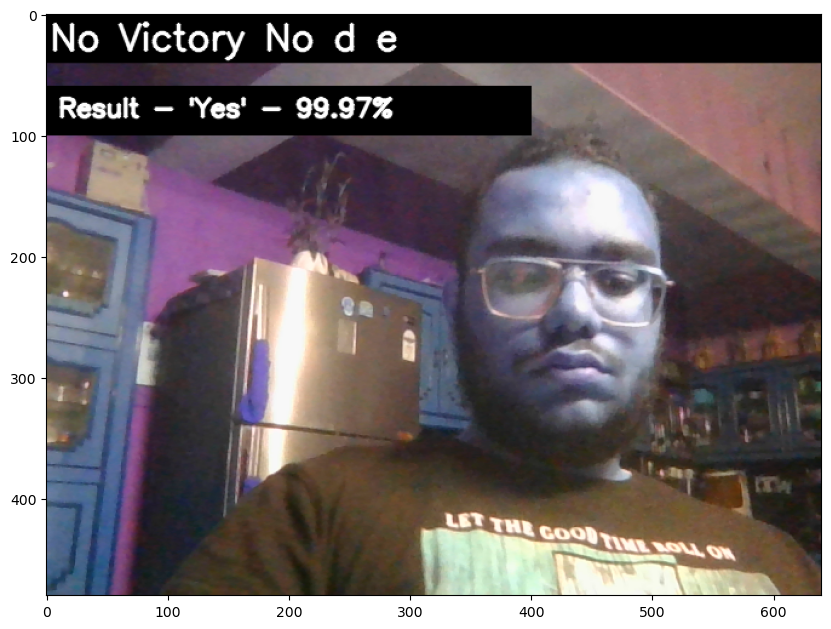

In [296]:
plt.figure(figsize=(10,10))
plt.imshow(prob_vizzz(res, actions, image, colors))

In [292]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoint(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_vizzz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (0, 0, 0),-1,cv2.LINE_AA)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', cv2.resize(image, (1400, 750)))

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 51ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Bye
<class 'mediapipe.python.solution_base.S

1/1 [==============================] - 0s 49ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
g
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 46ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 48ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 76ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
Victory
<cla

1/1 [==============================] - 0s 58ms/step
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [========

1/1 [==============================] - 0s 38ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
ThumbsUp
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
h
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
h
<class 'm

1/1 [==============================] - 0s 51ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 36ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
f
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 69ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 80ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Thanku
<class 'media

1/1 [==============================] - 0s 54ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Victory
<cla

In [170]:
cap.release()
cv2.destroyAllWindows()

In [293]:
sentence

['No', 'Victory', 'No', 'd', 'e']

In [294]:
res

array([3.8069695e-16, 1.0847646e-09, 2.9099079e-18, 1.7278148e-12,
       2.8011826e-04, 1.2116805e-09, 6.4881938e-14, 1.1941071e-30,
       9.4653937e-23, 2.7354949e-17, 3.4567920e-23, 9.9968731e-01,
       3.2442321e-10, 1.5148491e-26, 2.9161478e-14, 2.5259816e-12,
       1.0521444e-05, 9.7460553e-16, 2.6932055e-19, 2.2009568e-05],
      dtype=float32)

In [295]:
max(res)

0.9996873